# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [3]:
!pip install pymongo

     |████████████████████████████████| 509 kB 18.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 20.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

     |████████████████████████████████| 54 kB 4.0 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp1 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [6]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#,locations = locations)   #Use either track or locations

1349406509948678144
1349406510284156929
1349406510653300742
1349406510535888898
1349406511005626372
1349406511341170691
1349406511999508480
1349406512163168257
1349406512431702016
1349406512779825161
1349406513127780352
1349406513207537665
1349406513232834561
1349406513463402496
1349406513744531457
1349406514222661635
1349406514662969344
1349406514537119744
1349406514692444161
1349406514855903232
1349406514990116865
1349406515065716738
1349406515443228681
1349406515535306755
1349406515476656128
1349406516659449856
1349406516743270400
1349406516491808768
1349406517485838342
1349406517561319428
1349406517703933956
1349406517808648197
1349406517720711169
1349406517833961473
1349406518064640008
1349406518542626817
1349406518731546631
1349406519633305600
1349406519859818496
1349406520090521604
1349406520363143177
1349406520363151363
1349406521134895105
1349406521076101121
1349406521524801542
1349406522191867906
1349406522359619591
1349406522632237059
1349406522485272577
1349406522913288193


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [10]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Jan 13 17:28:38 +0000 2021'
'Wed Jan 13 17:27:57 +0000 2021'
'Wed Jan 13 17:27:54 +0000 2021'
'Wed Jan 13 17:27:52 +0000 2021'
'Wed Jan 13 17:27:48 +0000 2021'
'Wed Jan 13 17:27:36 +0000 2021'
'Wed Jan 13 17:27:34 +0000 2021'
'Wed Jan 13 17:27:28 +0000 2021'
'Wed Jan 13 17:27:26 +0000 2021'
'Wed Jan 13 17:27:24 +0000 2021'
'Wed Jan 13 17:27:23 +0000 2021'
'Wed Jan 13 17:27:01 +0000 2021'
'Wed Jan 13 17:26:36 +0000 2021'
'Wed Jan 13 17:26:33 +0000 2021'
'Wed Jan 13 17:26:13 +0000 2021'
'Wed Jan 13 17:26:08 +0000 2021'
'Wed Jan 13 17:26:03 +0000 2021'
'Wed Jan 13 17:26:01 +0000 2021'
'Wed Jan 13 17:25:54 +0000 2021'
'Wed Jan 13 17:24:51 +0000 2021'
'Wed Jan 13 17:24:41 +0000 2021'
'Wed Jan 13 17:24:33 +0000 2021'
'Wed Jan 13 17:24:25 +0000 2021'
'Wed Jan 13 17:24:13 +0000 2021'
'Wed Jan 13 17:24:00 +0000 2021'
'Wed Jan 13 17:23:39 +0000 2021'
'Wed Jan 13 17:23:36 +0000 2021'
'Wed Jan 13 17:23:33 +0000 2021'
'Wed Jan 13 17:23:24 +0000 2021'
'Wed Jan 13 17:23:21 +0000 2021'
'Wed Jan 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Jan 13 17:18:46 +0000 2021'
'Wed Jan 13 17:18:45 +0000 2021'
'Wed Jan 13 17:18:43 +0000 2021'
'Wed Jan 13 17:18:38 +0000 2021'
'Wed Jan 13 17:18:33 +0000 2021'
'Wed Jan 13 17:18:33 +0000 2021'
'Wed Jan 13 17:18:31 +0000 2021'
'Wed Jan 13 17:18:29 +0000 2021'
'Wed Jan 13 17:18:03 +0000 2021'
'Wed Jan 13 17:17:58 +0000 2021'
'Wed Jan 13 17:17:56 +0000 2021'
'Wed Jan 13 17:17:35 +0000 2021'
'Wed Jan 13 17:17:27 +0000 2021'
'Wed Jan 13 17:17:15 +0000 2021'
'Wed Jan 13 17:17:06 +0000 2021'
'Wed Jan 13 17:17:02 +0000 2021'
'Wed Jan 13 17:16:58 +0000 2021'
'Wed Jan 13 17:16:57 +0000 2021'
'Wed Jan 13 17:16:53 +0000 2021'
'Wed Jan 13 17:16:50 +0000 2021'
'Wed Jan 13 17:16:44 +0000 2021'
'Wed Jan 13 17:16:39 +0000 2021'
'Wed Jan 13 17:16:39 +0000 2021'
'Wed Jan 13 17:16:37 +0000 2021'
'Wed Jan 13 17:16:36 +0000 2021'
'Wed Jan 13 17:16:34 +0000 2021'
'Wed Jan 13 17:16:31 +0000 2021'
'Wed Jan 13 17:16:26 +0000 2021'
'Wed Jan 13 17:16:23 +0000 2021'
'Wed Jan 13 17:16:19 +0000 2021'
'Wed Jan 1

'Tue Jan 12 22:06:53 +0000 2021'
'Tue Jan 12 22:02:28 +0000 2021'
'Tue Jan 12 21:52:46 +0000 2021'
'Tue Jan 12 21:49:09 +0000 2021'
'Tue Jan 12 21:44:58 +0000 2021'
'Tue Jan 12 21:44:38 +0000 2021'
'Tue Jan 12 21:43:47 +0000 2021'
'Tue Jan 12 21:41:45 +0000 2021'
'Tue Jan 12 21:36:19 +0000 2021'
'Tue Jan 12 21:29:28 +0000 2021'
'Tue Jan 12 21:17:52 +0000 2021'
'Tue Jan 12 21:15:11 +0000 2021'
'Tue Jan 12 21:07:47 +0000 2021'
'Tue Jan 12 21:05:27 +0000 2021'
'Tue Jan 12 20:59:36 +0000 2021'
'Tue Jan 12 20:40:29 +0000 2021'
'Tue Jan 12 20:20:06 +0000 2021'
'Tue Jan 12 20:17:04 +0000 2021'
'Tue Jan 12 20:08:50 +0000 2021'
'Tue Jan 12 20:04:59 +0000 2021'
'Tue Jan 12 20:04:35 +0000 2021'
'Tue Jan 12 20:02:27 +0000 2021'
'Tue Jan 12 20:02:19 +0000 2021'
'Tue Jan 12 19:56:25 +0000 2021'
'Tue Jan 12 19:56:19 +0000 2021'
'Tue Jan 12 19:46:39 +0000 2021'
'Tue Jan 12 19:46:19 +0000 2021'
'Tue Jan 12 19:43:54 +0000 2021'
'Tue Jan 12 19:42:09 +0000 2021'
'Tue Jan 12 19:34:12 +0000 2021'
'Tue Jan 1

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

793
719


Create a text index and print the Tweets containing specific keywords. 

In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [14]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [15]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document   
        
         
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Buddy Spenser
text: @JoeManchinWV remember we still have slot of votes in WV for your next election to vote you out so go ahead vote to convict trump @MAGA
----
name: Claude367
text: RT @VoteGloriaJ: Today we voted on Constitutional officers. I voted yes on 2 of them, I couldn’t vote for Tre Hargett for SOS due to his su…
----
name: The Internal Resistance
text: RT @keithboykin: Once you block a vote on a Democratic Supreme Court Justice and then rush a vote on your own Supreme Court Justice, you do…
----
name: Rogue Bot Mom
text: @GoodForCongress You know what’s a sham? You and your GOP colleagues voting to throw out my vote and those of every… https://t.co/xBcTpkvbo9
----
name: Tommy Britt
text: @RichardHoyt12 @realDailyWire Georgia is proof that if you tell half of the voting population that their vote doesn… https://t.co/FFAUl27Mjq
----
name: Amanda Holland
text: Republicans are like,
"We'll don't negotiate with terrorists unless they are voting for me in a future electi

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [17]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,reply_count,filter_level,timestamp_ms,display_text_range,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,quoted_status_permalink
0,5fff2e68e3d6c2c62b9f799e,Tue Jan 12 16:59:42 +0000 2021,1349038355586166784,1349038355586166784,@JoeManchinWV remember we still have slot of v...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fff2c67e3d6c2c62b9f771a,Wed Jan 13 17:22:42 +0000 2021,1349406531700273152,1349406531700273152,RT @VoteGloriaJ: Today we voted on Constitutio...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0.0,low,1610558562575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fff2c6ee3d6c2c62b9f77a5,Wed Jan 13 17:22:49 +0000 2021,1349406561010114560,1349406561010114560,RT @keithboykin: Once you block a vote on a De...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0.0,low,1610558569563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fff2c6de3d6c2c62b9f778f,Wed Jan 13 17:22:48 +0000 2021,1349406556337569792,1349406556337569792,@GoodForCongress You know what’s a sham? You a...,True,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.349390e+18,...,0.0,low,1610558568449,"[17, 140]",{'full_text': '@GoodForCongress You know what’...,NaN,NaN,NaN,NaN,NaN
4,5fff2c66e3d6c2c62b9f770d,Wed Jan 13 17:22:41 +0000 2021,1349406528357474307,1349406528357474307,@RichardHoyt12 @realDailyWire Georgia is proof...,True,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.349383e+18,...,0.0,low,1610558561778,"[30, 140]",{'full_text': '@RichardHoyt12 @realDailyWire G...,NaN,NaN,NaN,NaN,NaN
5,5fff2c66e3d6c2c62b9f7704,Wed Jan 13 17:22:41 +0000 2021,1349406526105149442,1349406526105149442,"Republicans are like,\n""We'll don't negotiate ...",False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0.0,low,1610558561241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fff2c71e3d6c2c62b9f77e4,Wed Jan 13 17:22:52 +0000 2021,1349406573760827392,1349406573760827392,RT @JoyceWhiteVance: If you're not willing to ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,0.0,low,1610558572603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fff2c71e3d6c2c62b9f77d8,Wed Jan 13 17:22:52 +0000 2021,1349406571797700609,1349406571797700609,RT @JoyceWhiteVance: If you're not willing to ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0.0,low,1610558572135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fff2c6fe3d6c2c62b9f77b6,Wed Jan 13 17:22:50 +0000 2021,1349406564113936384,1349406564113936384,RT @JoyceWhiteVance: If you're not willing to ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,low,1610558570303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fff2c6ee3d6c2c62b9f77aa,Wed Jan 13 17:22:49 +0000 2021,1349406561790263297,1349406561790263297,RT @JoyceWhiteVance: If you're not willing to ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,low,1610558569749,NaN,NaN,NaN,NaN,NaN,NaN,NaN


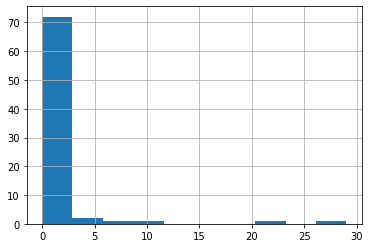

In [18]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count